In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [29]:
train=pd.read_csv('./train.csv', dtype=str)
test=pd.read_csv('./test.csv', dtype=str)

In [30]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,NaN,S


In [31]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,NaN,S


In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    object
 1   Survived     891 non-null    object
 2   Pclass       891 non-null    object
 3   Name         891 non-null    object
 4   Sex          891 non-null    object
 5   Age          714 non-null    object
 6   SibSp        891 non-null    object
 7   Parch        891 non-null    object
 8   Ticket       891 non-null    object
 9   Fare         891 non-null    object
 10  Cabin        204 non-null    object
 11  Embarked     889 non-null    object
dtypes: object(12)
memory usage: 83.7+ KB


In [33]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  418 non-null    object
 1   Pclass       418 non-null    object
 2   Name         418 non-null    object
 3   Sex          418 non-null    object
 4   Age          332 non-null    object
 5   SibSp        418 non-null    object
 6   Parch        418 non-null    object
 7   Ticket       418 non-null    object
 8   Fare         417 non-null    object
 9   Cabin        91 non-null     object
 10  Embarked     418 non-null    object
dtypes: object(11)
memory usage: 36.0+ KB


In [34]:
# 값이 불명확한 항목 및 수량 확인 => age / cabin
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [35]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [36]:
# Nan을 이전 자료로 대체
train = train.fillna(method='ffill')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,C85,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,C123,S


In [37]:
test = test.fillna(method='ffill')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,NaN,S


In [38]:
# 위의 값을 추정 시 Cabin에 null 값이 많음으로 drop 처리
train=train.drop(columns='Cabin')
test=test.drop(columns='Cabin')

<AxesSubplot:xlabel='Survived', ylabel='Age'>

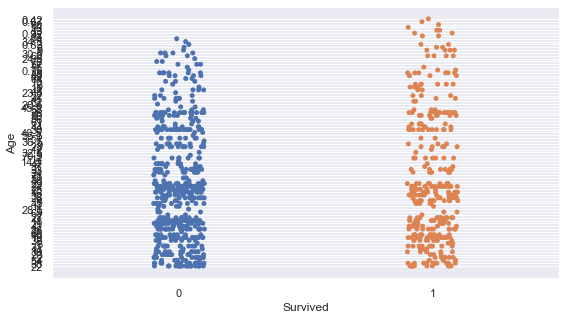

In [39]:
fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(1,2,1)
sns.stripplot(x='Survived',y= 'Age',
             data= train)

KeyError: 'key of type tuple not found and not a MultiIndex'

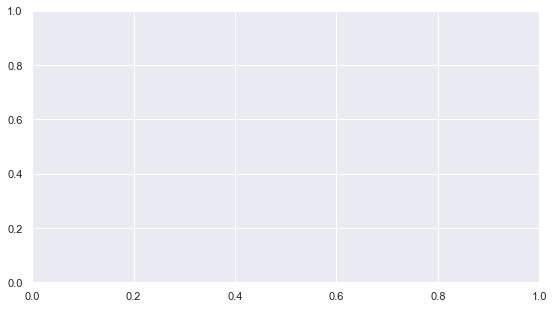

In [40]:
fig = plt.figure(figsize=(20, 5))
ax2 = fig.add_subplot(1,2,1)
a=train['Age']
b=train['Sex']
c=train['Survived']

plt.scatter(a[:,0], b[:,1])
plt.scatter(25, 150, marker="^")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

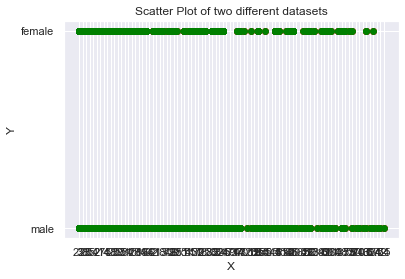

In [41]:


plt.scatter(a,b,c="red")
plt.scatter(a,b,c="green")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter Plot of two different datasets")
plt.show()

In [42]:
# 범주형 데이터 산점도



# 이산형 변수의 분포, 데이퍼 분산 미 고려(중복 표시 O)
sns.stripplot(x='Sex',y= 'Age',data= train, ax = ax1)
plt.scatter(x,c="red")
plt.scatter(x,c="green")
plt.xlabel("X")
plt.ylabel("Y")





 
plt.show()        

NameError: name 'x' is not defined

In [43]:
# 범주형 데이터 산점도

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
# 이산형 변수의 분포, 데이퍼 분산 미 고려(중복 표시 O)




ax2.set_title('Swarm plot')
plt.show()        

TypeError: Neither the `x` nor `y` variable appears to be numeric.

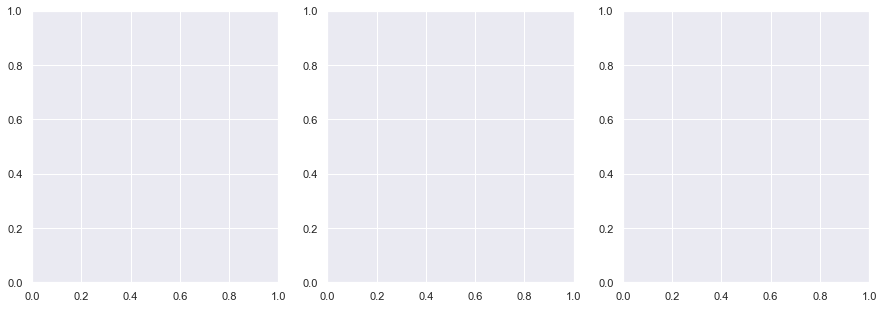

In [44]:
# 막대 그래프 : barplot()
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.barplot(x='Sex', y='Survived', data=tra, ax=ax1)
sns.barplot(x='Sex', y='Survived', data=titanic, hue='Pclass', ax=ax2)
sns.barplot(x='Sex', y='Survived', data=titanic, hue='Pclass',
            dodge=False, ax=ax3)

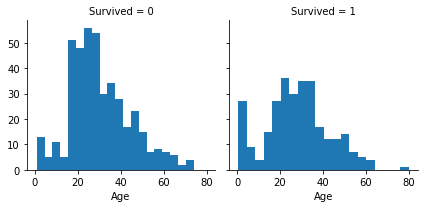

In [59]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

In [63]:
from sklearn.model_selection import train_test_split
data = train[['PassengerId','Survived', 'Pclass','Age','SibSp','Parch','Fare']].to_numpy()
target = train['Survived'].to_numpy()
train_input, test_input, train_target, test_target = train_test_split(
data, target, test_size=800, random_state=0)

In [18]:
ss=train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
print(ss)
# 성별에 따른 생존률 계산 => 여성들이 생존률이 더 높았음

      Sex  Survived
0  female  0.742038
1    male  0.188908


In [26]:
import seaborn as sns

In [45]:
def pie_chart(feature):
    feature_ratio = train[feature].value_counts(sort=False)
    feature_size = feature_ratio.size
    feature_index = feature_ratio.index
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    

    plt.plot(aspect='auto')
    plt.pie(feature_ratio, labels=feature_index, autopct='%1.1f%%')
    plt.title(feature + '\'s ratio in total')
    plt.show()

    for i, index in enumerate(feature_index):
        plt.subplot(1, feature_size + 1, i + 1, aspect='equal')
        plt.pie([survived[index], dead[index]], labels=['Survivied', 'Dead'], autopct='%1.1f%%')
        plt.title(str(index) + '\'s ratio')

plt.show()

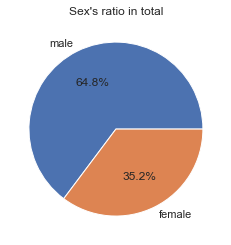

KeyError: 'male'

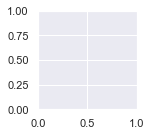

In [46]:
pie_chart('Sex')

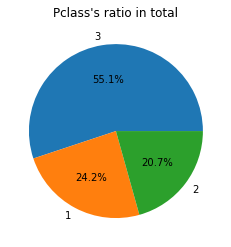

In [27]:
pie_chart('Pclass')